In [156]:
from dip.sequence_for_nn import *

In [256]:
length = 10000

In [257]:
container = Container()
container.read_seq("../data/myco_genome.fasta", "fasta")
container.cut_seq(length = length, start = 0)
container.generate_seq_last()

container created
read seq from file ../data/myco_genome.fasta, length = 4399916
cuted seq for analysis, length = 10000, start = 0, part = 0.0-0.2
generated seq_np


In [258]:
container.seq_np.shape

(10000, 4)

In [259]:
container.generate_mask_last()

generated mask with 962 spots of 1 bp


In [260]:
container.mask_np.shape

(10000, 4)

In [261]:
inp = np.expand_dims(np.random.rand(length, 4), 0)
end = np.expand_dims(container.seq_np, 0)
mask = container.mask_np
print(inp.shape)
print(end.shape)
print(mask.shape)

(1, 10000, 4)
(1, 10000, 4)
(10000, 4)


(10000, 4)

In [262]:
# mask

In [263]:
# inp = np.array([[[0.4, 0.4, 0.1, 0.1], [0.5, 0.3, 0.1, 0.1]]])
# end = np.array([[[0, 1, 0, 0], [1, 0, 0, 0]]])

In [264]:
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, UpSampling1D, BatchNormalization, Input, concatenate
from keras import backend as K
from keras.models import Model

In [265]:
x0 = Input(shape=(length,4))
x1 = Conv1D(16, (4), activation='relu', padding='same')(x0)
x1 = MaxPooling1D((2), padding='same')(x1) # x1 (64, 64, 16)

# x2 = Conv2D(8, (4, 4), activation='relu', padding='same')(x1)
# x2 = MaxPooling2D((2, 2), padding='same')(x2) # x2 (32, 32, 8)

# # x3 = Conv2D(8, (4, 4), activation='relu', padding='same')(x2)
# # x3 = MaxPooling2D((2, 2), padding='same')(x3) #x3 (16, 16, 8)

# # # at this point the representation is (4, 4, 8) i.e. 128-dimensional


# # x97 = Conv2D(8, (3, 3), activation='relu', padding='same')(x3)
# # x97 = UpSampling2D((2, 2))(x97) #x97 (32, 32, 8)

# x98 = Conv2D(8, (3, 3), activation='relu', padding='same')(concatenate([x97, x2]))
# x98 = UpSampling2D((2, 2))(x98) # x98 (64, 64, 8)

# x99 = Conv1D(16, (3), activation='relu', padding = "same")(concatenate([x98, x1]))
x99 = Conv1D(16, (3), activation='relu', padding = "same")(x1)
x99 = UpSampling1D((2))(x99) #x99 (128, 128, 16)

decoded = Conv1D(4, (3), activation='softmax', padding='same')(x99)


model = Model(x0, decoded)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 10000, 4)          0         
_________________________________________________________________
conv1d_55 (Conv1D)           (None, 10000, 16)         272       
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 5000, 16)          0         
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 5000, 16)          784       
_________________________________________________________________
up_sampling1d_18 (UpSampling (None, 10000, 16)         0         
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 10000, 4)          196       
Total params: 1,252
Trainable params: 1,252
Non-trainable params: 0
_________________________________________________________________


In [266]:
def losss(y_true, y_pred):
    return keras.losses.categorical_crossentropy(y_true * mask + 0.000001, y_pred * mask + 0.000001)
#     return keras.losses.mean_squared_error(y_true * mask, y_pred * mask)


In [ ]:
model.compile(optimizer='adam', loss=losss, metrics = ['acc'])

In [ ]:
model.fit(inp, end, epochs = 1000, verbose = 1)

Epoch 1/1000
1/1 [==============================] - 0s 234ms/step - loss: 1.1339 - acc: 0.4095
Epoch 2/1000
1/1 [==============================] - 0s 197ms/step - loss: 1.1339 - acc: 0.4099
Epoch 3/1000
1/1 [==============================] - 0s 183ms/step - loss: 1.1339 - acc: 0.4095
Epoch 4/1000
1/1 [==============================] - 0s 200ms/step - loss: 1.1338 - acc: 0.4089
Epoch 5/1000
1/1 [==============================] - 0s 196ms/step - loss: 1.1338 - acc: 0.4094
Epoch 6/1000
1/1 [==============================] - 0s 198ms/step - loss: 1.1338 - acc: 0.4093
Epoch 7/1000
1/1 [==============================] - 0s 202ms/step - loss: 1.1338 - acc: 0.4093
Epoch 8/1000
1/1 [==============================] - 0s 201ms/step - loss: 1.1337 - acc: 0.4094
Epoch 9/1000
1/1 [==============================] - 0s 189ms/step - loss: 1.1337 - acc: 0.4090
Epoch 10/1000
1/1 [==============================] - 0s 200ms/step - loss: 1.1337 - acc: 0.4097
Epoch 11/1000
1/1 [==============================

In [ ]:
# model.predict_classes(inp)
# model.predict_proba(inp)
# model.predict(inp)

In [ ]:
model.evaluate(inp, end)

In [ ]:
out = model.predict(inp)

In [ ]:
# mask_inv = np.abs(mask - 1)

In [ ]:
# out * mask_inv
# y_true = K.constant(end * mask_inv)
# y_pred = K.constant(out * mask_inv)

# g = K.categorical_crossentropy(target=y_true, output=y_pred)
# sess = tf.Session()
# with sess.as_default():
#     print(g.eval())

In [ ]:
predicted = 0
mask_len = 0
for i in range(mask.shape[0]):
    if mask[i, 0] == 0:
        mask_len += 1
        if np.argmax(out[0, i, ...]) == np.argmax(inp[0, i, ...]):
            predicted += 1
            
print(predicted, mask_len, predicted/mask_len)

In [242]:
out.shape

(1, 100, 4)

In [202]:

y_true = K.constant([[0, 0, 0, 0], [1, 0, 0, 0]]) + 0.0001
y_pred = K.constant([[0, 0, 0, 0], [0, 1, 0, 0]]) + 0.0001

g = K.categorical_crossentropy(target=y_true, output=y_pred)
sess = tf.Session()
with sess.as_default():
    print(g.eval())

[  5.54517726e-04   9.21350384e+00]


In [92]:
# keras.losses.categorical_crossentropy(y_true * mask, y_pred * mask)

Epoch 1/1000


array([[[  1.14853634e-02,   6.11321628e-01,   3.30653310e-01,
           4.65396717e-02],
        [  1.11708073e-02,   5.65856099e-01,   2.39708036e-01,
           1.83265060e-01],
        [  9.39028338e-02,   5.69269024e-02,   3.88531089e-02,
           8.10317218e-01],
        [  6.09829724e-01,   2.31508445e-02,   1.08906157e-01,
           2.58113325e-01],
        [  1.86565205e-01,   4.05194424e-02,   7.50281930e-01,
           2.26334762e-02],
        [  4.02400978e-02,   7.03609586e-02,   8.22412133e-01,
           6.69868216e-02],
        [  8.68226737e-02,   3.90985906e-02,   7.52231926e-02,
           7.98855543e-01],
        [  7.59368837e-01,   1.10073024e-02,   1.15916096e-01,
           1.13707684e-01],
        [  5.36819160e-01,   4.07972746e-02,   1.96307644e-01,
           2.26075962e-01],
        [  7.52590224e-02,   7.65460134e-02,   2.18689209e-03,
           8.46008062e-01],
        [  7.68536925e-01,   3.70384939e-02,   5.59929274e-02,
           1.38431713e-01],

# 2D with pics

In [1]:
# from PIL import Image
import numpy as np
import math
# import IPython
import matplotlib.pyplot as plt
%matplotlib inline

(64, 64, 3)
(10, 64, 64, 3)


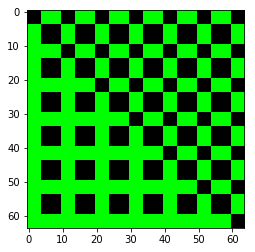

In [2]:
length = 64
array = np.zeros((length, length, 3))

for line in range(0, length, 10):
    array[line:line+4, :, 1] = 1
    array[:, line:line+4, 1] = np.abs(array[:, line:line+4, 1] - 1)
print(array.shape)

array_image = (array * 255).astype(np.uint8)
#image = Image.fromarray(array_image)
# image.show()
imgplot = plt.imshow(array_image)
# IPython.display.display(IPython.display.Image(image))

array_10 = np.array([array for i in range(10)])
print(array_10.shape)

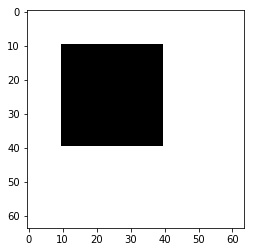

In [3]:
mask = np.zeros((length, length, 3))
mask.fill(1)
for line in range(10, 40):
    mask[line, 10:40, :] = 0
    
mask_image = (mask * 255).astype(np.uint8)
# image = Image.fromarray(mask_image)
# image.show()
imgplot = plt.imshow(mask_image)

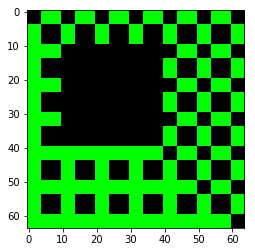

In [4]:
masked_image = (array * mask * 255).astype(np.uint8)
# image = Image.fromarray(masked_image)
# image.show()
imgplot = plt.imshow(masked_image)

In [5]:
inp = np.random.rand(length, length, 32)
print(inp.shape)

# for i in np.nditer(inp):
#     i = math.trunc(i * 255)
# image = Image.fromarray(inp.astype(np.uint8))
# image.show()
inp_10 = np.array([inp for i in range(10)])
print(inp_10.shape)

(64, 64, 32)
(10, 64, 64, 32)


In [6]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input, Dense, Concatenate, concatenate
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [7]:
input_shape = (length, length, 32)

input_img = Input(shape=(length, length, 32))
x1 = Conv2D(16, (4, 4), activation='relu', padding='same')(input_img)
x1 = MaxPooling2D((2, 2), padding='same')(x1) # x1 (64, 64, 16)

x2 = Conv2D(8, (4, 4), activation='relu', padding='same')(x1)
x2 = MaxPooling2D((2, 2), padding='same')(x2) # x2 (32, 32, 8)

x3 = Conv2D(8, (4, 4), activation='relu', padding='same')(x2)
x3 = MaxPooling2D((2, 2), padding='same')(x3) #x3 (16, 16, 8)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional


x97 = Conv2D(8, (3, 3), activation='relu', padding='same')(x3)
x97 = UpSampling2D((2, 2))(x97) #x97 (32, 32, 8)

x98 = Conv2D(8, (3, 3), activation='relu', padding='same')(concatenate([x97, x2]))
x98 = UpSampling2D((2, 2))(x98) # x98 (64, 64, 8)

x99 = Conv2D(16, (3, 3), activation='relu', padding = "same")(concatenate([x98, x1]))
x99 = UpSampling2D((2, 2))(x99) #x99 (128, 128, 16)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x99)


model = Model(input_img, decoded)


In [8]:
import keras

def customLoss(y_true,y_pred):
    return keras.losses.mean_squared_error(y_true * mask, y_pred * mask)


In [9]:
model.compile(optimizer='adam', loss=customLoss)

In [10]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 32)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 16)   8208        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 32, 32, 16)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 8)    2056        max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
max_poolin

In [11]:
model.fit(inp_10, array_10, epochs = 400)

Epoch 1/400


InternalError: Failed to create session.

In [57]:
out_10 = model.predict(inp_10)

In [58]:
out_10.shape
out = out_10[1]
out.shape

(64, 64, 3)

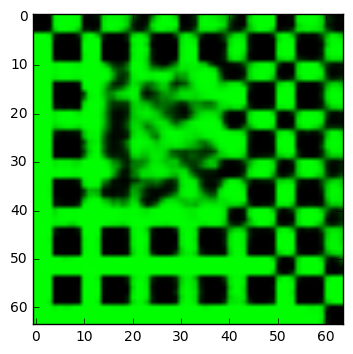

In [59]:
out_image = (out * 255).astype(np.uint8)
plt.imshow(out_image)

categorical crossentropy 
https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

In [114]:

import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [151]:
# fix random seed for reproducibility
seed = 5
numpy.random.seed(seed)

In [152]:
# load dataset
dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]


In [153]:
len(Y)

150

In [154]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [155]:
dummy_y.shape

(150, 3)

In [156]:
ids = np.arange(len(Y))
np.random.shuffle(ids)

train_ids = ids[0:140]
test_ids = ids[140:len(Y)]

train_X = X[train_ids, ...]
train_Y = dummy_y[train_ids, ...]
test_X = X[test_ids, ...]
test_Y = dummy_y[test_ids, ...]

In [157]:
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((140, 4), (140, 3), (10, 4), (10, 3))

In [158]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [159]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='relu'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [160]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [161]:
model.fit(x = train_X, y = train_Y, epochs=100, batch_size=5, verbose=1)

Epoch 1/100
140/140 [==============================] - 1s 9ms/step - loss: 0.7962 - acc: 0.6143
Epoch 2/100
140/140 [==============================] - 0s 2ms/step - loss: 0.6536 - acc: 0.6643
Epoch 3/100
140/140 [==============================] - 0s 2ms/step - loss: 0.5568 - acc: 0.7857
Epoch 4/100
140/140 [==============================] - 0s 1ms/step - loss: nan - acc: 0.5429
Epoch 5/100
140/140 [==============================] - 0s 1ms/step - loss: nan - acc: 0.3357
Epoch 6/100
140/140 [==============================] - 0s 2ms/step - loss: nan - acc: 0.3357
Epoch 7/100
140/140 [==============================] - 0s 2ms/step - loss: nan - acc: 0.3357
Epoch 8/100
140/140 [==============================] - 0s 2ms/step - loss: nan - acc: 0.3357
Epoch 9/100
140/140 [==============================] - 0s 2ms/step - loss: nan - acc: 0.3357
Epoch 10/100
140/140 [==============================] - 0s 2ms/step - loss: nan - acc: 0.3357
Epoch 11/100
140/140 [==============================] - 0s 2

In [162]:
score = model.evaluate(test_X, test_Y)

10/10 [==============================] - 0s 22ms/step


In [163]:
score

[nan, 0.30000001192092896]